In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
torch.cuda.is_available()

True

In [4]:
import pdb

In [5]:
from IPython.display import set_matplotlib_formats

In [6]:
set_matplotlib_formats("svg")
plt.style.use("ggplot")

In [14]:
from fastai import *
from fastai.vision import *

import PIL

In [7]:
from fastai.datasets import datapath4file

In [18]:
doc(datapath4file)

In [17]:
?? datapath4file

In [8]:
torch.cuda.is_available()

True

In [15]:
?? pil2tensor

In [16]:
def openMultiChannelImage(fpArr):
    '''
    Open multiple images and return a single multi channel image
    '''
    mat = None
    nChannels = len(fpArr)
    for i, fp in enumerate(fpArr):
        img = PIL.Image.open(fp)
        chan = pil2tensor(img, np.float64).float().div_(255)
        if(mat is None):
            mat = torch.zeros((nChannels, chan.shape[1], chan.shape[2]))
        mat[i,:,:] = chan
    return Image(mat)

In [10]:
TRN_PATH = Path('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train')

In [4]:
??pil2tensor

In [11]:
id = '80e422c4-bbc7-11e8-b2bc-ac1f6b6435d0'

In [12]:
r = TRN_PATH/f"{id}_red.png"
g = TRN_PATH/f"{id}_green.png"
b = TRN_PATH/f"{id}_blue.png"
y = TRN_PATH/f"{id}_yellow.png"


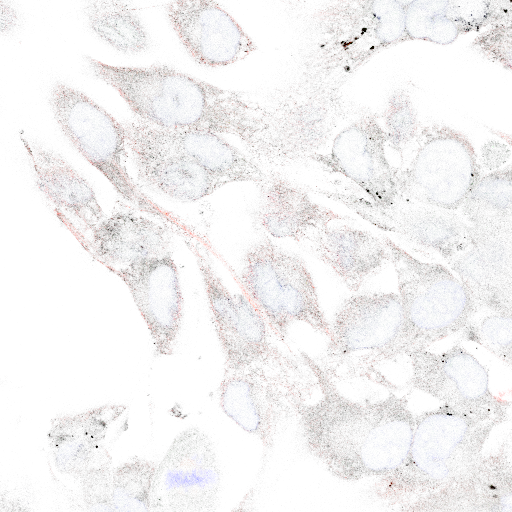

In [17]:
openMultiChannelImage([r,g,b,y])

In [62]:
class MultiChannelDataset(ImageMultiDataset):
    def __init__(self, x:Collection[Any], y:Collection[Collection[str]], classes: Optional[Collection[Any]]=None):
        if ((y is not None) and (len(y)>0)):
            assert len(x) == len(y)
        super().__init__(fns=None, labels=y, classes=classes)
        self.x = x
        self.isTest = (y is None) or (len(y)==0)
        
    def _get_x(self, i):
        
        img = openMultiChannelImage(self.x[i,1:])
        var = img.data.shape
        return img
    
    def _get_y(self, i, x):
        if (self.isTest):
            return [0]
        else:
            return super()._get_y(i, x)
        
    @classmethod
    def create_test_dataset(cls, x:Collection[Any], classes: Collection[Any]):
        return cls(x, [], classes)

In [19]:
ddir = Path("/home/edwin/Datasets/competitions/human-protein-atlas-image-classification")

In [20]:
extractFileName = lambda l: l.stem
extractProtein = lambda l: l.split('_')[0]
extractFilt = lambda l: l.split('_')[1]

In [21]:
def createDF(path_to_folder:Path):
    all_files = path_to_folder.ls()
    np.random.shuffle(all_files)
    filename = list(map(extractFileName, all_files))
    protein = list(map(extractProtein, filename))
    filt = list(map(extractFilt, filename))
    src = pd.DataFrame({
        'path': all_files,
        'protein': protein,
        'filt': filt
    })
    
    ret = src.pivot_table(index='protein', columns='filt', values='path', aggfunc='sum')
    ret = ret.reset_index()
    return ret

In [22]:
train_df = createDF(ddir/'train')

In [23]:
train_df.head()

filt,protein,blue,green,red,yellow
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...


In [24]:
test_df = createDF(ddir/'test')

In [26]:
test_df.head()

filt,protein,blue,green,red,yellow
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...


In [27]:
labels_df = pd.read_csv(ddir/'train.csv')

In [28]:
labels_df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [29]:
classesStrToArray = lambda l: l.split(' ')

In [30]:
labels_df['labels'] = labels_df.Target.apply(classesStrToArray)

In [31]:
labels_df = labels_df.drop(['Target'], axis=1)

In [32]:
display(labels_df.head(3))

,Id,labels
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]


In [33]:
labels_df.head(3).values

array([['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0', list(['16', '0'])],
       ['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0', list(['7', '1', '2', '0'])],
       ['000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', list(['5'])]], dtype=object)

In [34]:
labels_df = labels_df.rename(columns={'Id': 'protein'})

In [35]:
labels_df.head()

,protein,labels
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1]
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18]


In [36]:
train_df.head()

filt,protein,blue,green,red,yellow
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...


In [37]:
train_data_and_labels_df = train_df.join(labels_df, rsuffix='_lab')

In [38]:
train_data_and_labels_df.drop(['protein_lab'], axis=1)

,protein,blue,green,red,yellow,labels
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,[5]
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,[1]
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,[18]
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,[0]
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,"[25, 2]"
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,[0]
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,"[2, 0]"
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,[7]


In [39]:
train_data_and_labels_df.head(3)

,protein,blue,green,red,yellow,protein_lab,labels
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,/home/edwin/Datasets/competitions/human-protei...,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]


In [40]:
train_data_and_labels_df.columns

Index(['protein', 'blue', 'green', 'red', 'yellow', 'protein_lab', 'labels'], dtype='object')

In [41]:
flat_list = lambda l: [item for sublist in l for item in sublist] 

In [42]:
train_data_and_labels_df["labels"]

0             [16, 0]
1        [7, 1, 2, 0]
2                 [5]
3                 [1]
4                [18]
5                 [0]
6             [25, 2]
7                 [0]
8              [2, 0]
9                 [7]
10               [23]
11               [21]
12            [24, 0]
13               [23]
14             [6, 2]
15               [25]
16            [25, 0]
17               [25]
18                [0]
19           [25, 11]
20       [7, 1, 2, 0]
21               [11]
22            [25, 2]
23            [25, 0]
24            [25, 3]
25            [16, 6]
26            [25, 2]
27               [23]
28               [25]
29            [12, 0]
             ...     
31042     [25, 18, 0]
31043      [25, 2, 0]
31044             [0]
31045         [11, 0]
31046             [0]
31047          [7, 0]
31048             [4]
31049          [3, 0]
31050         [25, 7]
31051      [19, 2, 0]
31052         [25, 7]
31053             [0]
31054             [5]
31055         [25, 0]
31056     

In [43]:
classes = list(set(flat_list(train_data_and_labels_df["labels"])))
classes = sorted(classes,key=int)
classes

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27']

In [44]:
classes_to_idx_dict = {x: i for i, x in enumerate(classes)}
ix_to_classes_dict = {i: x for i, x in enumerate(classes)}

In [45]:
train_and_valid_x = train_data_and_labels_df[train_df.columns].values

In [46]:
train_and_valid_x[:3]

array([['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0',
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png')],
       ['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png'),
      

In [47]:
len(train_and_valid_x)

31072

In [48]:
train_and_valid_y = train_data_and_labels_df["labels"].values

In [49]:
train_and_valid_y[:3]

array([list(['16', '0']), list(['7', '1', '2', '0']), list(['5'])], dtype=object)

In [50]:
type(train_and_valid_y[0][0])

str

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train_and_valid_x, 
    train_and_valid_y, 
    test_size=0.2, 
    random_state=42)

In [70]:
len(x_train)

24857

In [53]:
from typing import Dict

In [63]:
train_ds = MultiChannelDataset(x_train, y_train)
valid_ds = MultiChannelDataset(x_valid, y_valid)

/home/edwin/Developer/kaggle-comps/nbs/fastai/vision/data.py:122: UserWarning: `ImageMultiDataset` is deprecated and will soon be removed. Use the data block API.
  warnings.warn("`ImageMultiDataset` is deprecated and will soon be removed. Use the data block API.")


In [66]:
train_ds[3]

(Image (4, 512, 512),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [67]:
test_df.values

array([['00008af0-bad0-11e8-b2b8-ac1f6b6435d0',
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_green.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yellow.png')],
       ['0000a892-bacf-11e8-b2b8-ac1f6b6435d0',
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png'),
        Posi

In [68]:
x_test = test_df.values

In [69]:
x_test[:5]

array([['00008af0-bad0-11e8-b2b8-ac1f6b6435d0',
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_green.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yellow.png')],
       ['0000a892-bacf-11e8-b2b8-ac1f6b6435d0',
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png'),
        PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test/0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png'),
        Posi

In [70]:
train_ds.classes

['7',
 '1',
 '5',
 '11',
 '25',
 '0',
 '21',
 '18',
 '23',
 '2',
 '16',
 '19',
 '22',
 '3',
 '13',
 '14',
 '12',
 '4',
 '6',
 '17',
 '8',
 '26',
 '24',
 '20',
 '27',
 '9',
 '10',
 '15']

In [71]:
test_ds = MultiChannelDataset.create_test_dataset(x_test, train_ds.classes)

/home/edwin/Developer/kaggle-comps/nbs/fastai/vision/data.py:122: UserWarning: `ImageMultiDataset` is deprecated and will soon be removed. Use the data block API.
  warnings.warn("`ImageMultiDataset` is deprecated and will soon be removed. Use the data block API.")


In [72]:
tfms = get_transforms(flip_vert=True, do_flip=True, max_rotate=30, 
                      max_zoom=1.1, max_lighting=None, max_warp=None, 
                     p_affine=0., p_lighting=0.)

In [73]:
bs = 64

In [74]:
data = ImageDataBunch.create(path=ddir, train_ds=train_ds, valid_ds=valid_ds, test_ds=test_ds, ds_tfms=tfms, bs=bs, size=224)

In [105]:
train_ds[0]

(Image (4, 512, 512),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

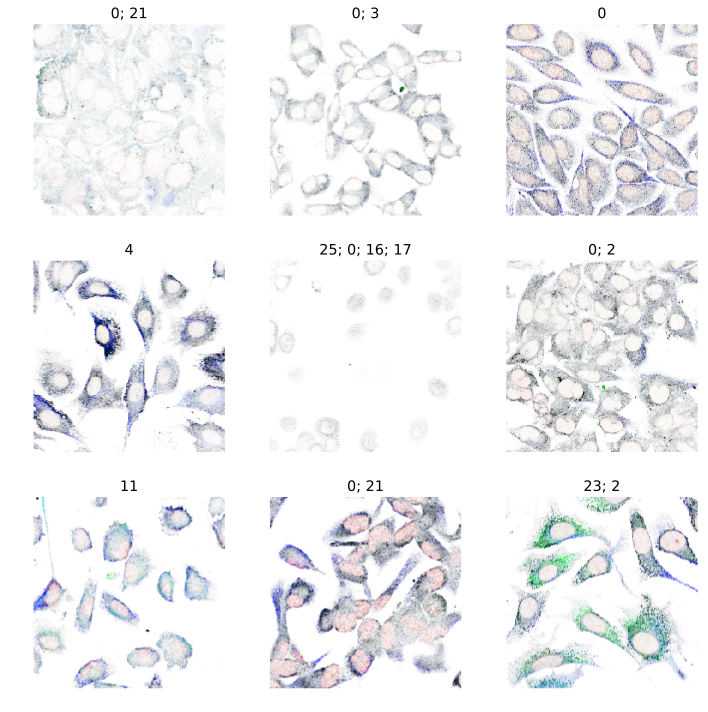

In [75]:
data.show_batch(rows=3, figsize=(10,10))

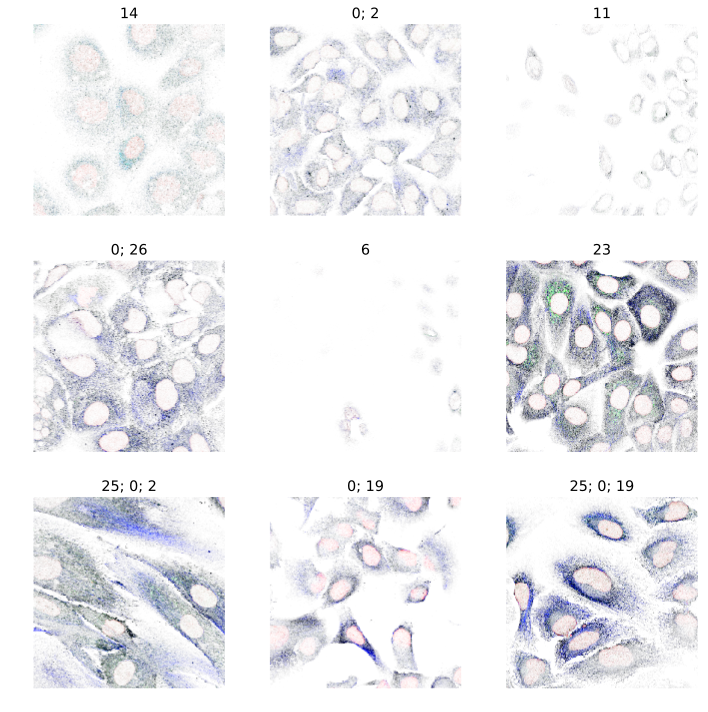

In [107]:
data.show_batch(rows=3, figsize=(10,10))

In [76]:
learn = create_cnn(data, models.resnet34, metrics=[fbeta, accuracy_thresh], pretrained=False)

In [77]:
nChannels = 4

In [79]:
learn.model[0][0] = nn.Conv2d(nChannels,64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [80]:
learn.model.cuda()

Sequential(
  (0): Sequential(
    (0): Conv2d(4, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [81]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


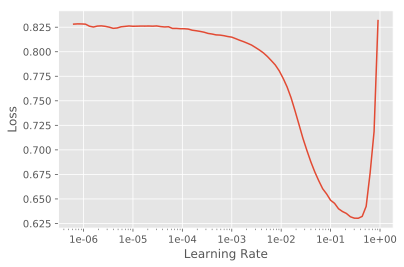

In [82]:
learn.recorder.plot()

In [83]:
lr = 1e-2

In [84]:
learn.fit_one_cycle(8, slice(1e-4, 1e-2))

Total time: 1:51:48
epoch  train_loss  valid_loss  fbeta  accuracy_thresh   
1      0.172658    0.241284    0.150078  0.930066         (22:52)
2      0.162551    0.231086    0.158649  0.934622         (18:14)
3      0.157845    0.226078    0.150328  0.930140         (12:36)
4      0.151608    0.271351    0.142721  0.933956         (10:09)
5      0.145155    0.241546    0.188133  0.926985         (13:43)
6      0.142031    0.260912    0.173426  0.924497         (10:53)
7      0.137394    0.252282    0.180022  0.925773         (08:48)
8      0.136798    0.251019    0.178308  0.926468         (14:30)



In [86]:
learn.save("stage-1-protein-4-chan.pth")

In [87]:
test_preds, y = learn.get_preds(ds_type=DatasetType.Test)

/home/edwin/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1126: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [89]:
len(test_preds)

11702

In [90]:
def tresholdPreds(v, treshold_percent=.5):
    # min max scale
    v_min = min(v)
    v_max = max(v)
    delta = v_max - v_min
    treshold = v_min + (delta*treshold_percent)
    mask=(v>=treshold)
    ret = np.copy(v)
    ret[mask]=1
    ret[np.logical_not(mask)]=0
    return ret
    

In [99]:
test_preds[0]

tensor([2.9374e-02, 5.5556e-03, 1.0925e-01, 9.0612e-03, 2.6451e-02, 8.0040e-02,
        6.4727e-03, 9.8759e-03, 1.0499e-02, 4.0066e-01, 7.4773e-03, 2.7320e-02,
        1.2548e-02, 4.0988e-01, 9.3958e-04, 1.0162e-03, 1.7553e-03, 9.7317e-02,
        6.7967e-04, 4.9298e-04, 2.4782e-04, 4.7980e-03, 1.5798e-02, 9.8584e-04,
        5.3541e-05, 5.7355e-05, 2.4031e-05, 6.2823e-05])

In [91]:
tresholdPreds(test_preds[0])

array([0.000000e+00, 0.000000e+00, 1.092500e-01, 9.061197e-03, 2.645143e-02, 8.003980e-02, 6.472747e-03, 9.875929e-03,
       1.049884e-02, 4.006572e-01, 7.477292e-03, 2.732012e-02, 1.254781e-02, 4.098795e-01, 9.395808e-04, 1.016243e-03,
       1.755317e-03, 9.731711e-02, 6.796703e-04, 4.929845e-04, 2.478177e-04, 4.798047e-03, 1.579778e-02, 9.858378e-04,
       5.354109e-05, 5.735537e-05, 2.403068e-05, 6.282291e-05], dtype=float32)

In [92]:
def predictionsTreshToClasses(v, classes):
    return np.array(classes)[v==1]

In [93]:

# Convert classes list to string
def classesToString(v, sep):
    return sep.join(list(v))

In [105]:
ppreds[0]

0.029374257

In [110]:
preds_tresh = list(map(lambda v: tresholdPreds(v,.75), ppreds))

In [111]:
preds_tresh[:10]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=fl

In [97]:
data.classes

['7',
 '1',
 '5',
 '11',
 '25',
 '0',
 '21',
 '18',
 '23',
 '2',
 '16',
 '19',
 '22',
 '3',
 '13',
 '14',
 '12',
 '4',
 '6',
 '17',
 '8',
 '26',
 '24',
 '20',
 '27',
 '9',
 '10',
 '15']

In [112]:
predictionsTreshToClasses(preds_tresh[0], data.classes)

array(['2', '3'], dtype='<U2')

In [108]:
ppreds = test_preds.numpy()

In [109]:
ppreds[0]

array([2.937426e-02, 5.555620e-03, 1.092500e-01, 9.061197e-03, 2.645143e-02, 8.003980e-02, 6.472747e-03, 9.875929e-03,
       1.049884e-02, 4.006572e-01, 7.477292e-03, 2.732012e-02, 1.254781e-02, 4.098795e-01, 9.395808e-04, 1.016243e-03,
       1.755317e-03, 9.731711e-02, 6.796703e-04, 4.929845e-04, 2.478177e-04, 4.798047e-03, 1.579778e-02, 9.858378e-04,
       5.354109e-05, 5.735537e-05, 2.403068e-05, 6.282291e-05], dtype=float32)

In [113]:
preds_classes=list(map(lambda v: classesToString(predictionsTreshToClasses(v,data.classes),' '),preds_tresh))

In [114]:
len(preds_classes)

11702

In [115]:
preds_classes[0]

'2 3'

In [116]:
preds_name = [v[0] for v in data.test_dl.dl.dataset.x]
print('preds_name :',preds_name[:10])
print('preds_name len: ',len(preds_name))

preds_name : ['00008af0-bad0-11e8-b2b8-ac1f6b6435d0', '0000a892-bacf-11e8-b2b8-ac1f6b6435d0', '0006faa6-bac7-11e8-b2b7-ac1f6b6435d0', '0008baca-bad7-11e8-b2b9-ac1f6b6435d0', '000cce7e-bad4-11e8-b2b8-ac1f6b6435d0', '00109f6a-bac8-11e8-b2b7-ac1f6b6435d0', '001765de-bacd-11e8-b2b8-ac1f6b6435d0', '0018641a-bac9-11e8-b2b8-ac1f6b6435d0', '00200f22-bad7-11e8-b2b9-ac1f6b6435d0', '0026f154-bac6-11e8-b2b7-ac1f6b6435d0']
preds_name len:  11702


In [117]:
preds_name[0]

'00008af0-bad0-11e8-b2b8-ac1f6b6435d0'

In [118]:
df_test = pd.DataFrame({'Id': preds_name, "Predicted": preds_classes })

In [119]:
df_test.to_csv("test-predict.csv", index=False)

In [120]:
from IPython.display import FileLink

In [121]:
FileLink("test-predict.csv")

/home/edwin/Developer/kaggle-comps/nbs/test-predict.csv